In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']
X

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,updateServiceLocation,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,0,37,10
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,0,2,2838,46
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,0,1,111,20
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,0,7,987,197
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,0,1,98,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,0,10,2764,236
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,0,1,0,5,4417,295
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,0,5,241,67
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,0,3,1703,774


In [4]:
Y=df.loc[:,'Class']
Y

0        1
1        1
2        1
3        1
4        1
        ..
11593    0
11594    0
11595    0
11596    0
11597    0
Name: Class, Length: 11598, dtype: int64

In [5]:
folder='Shafin all'

In [6]:
import tracemalloc
import os
import psutil
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [7]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [8]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import AdaBoostClassifier

a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rf', RandomForestClassifier()))
	level0.append(('lgb', lgb.LGBMClassifier()))
	level0.append(('etc', ExtraTreesClassifier()))
	#level0.append(('bag', BaggingClassifier()))
	#level0.append(('gboost', GradientBoostingClassifier()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	#model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	model = StackingClassifier(estimators=level0, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['rf'] = RandomForestClassifier()
	models['lgb'] = lgb.LGBMClassifier()
	models['etc'] =  ExtraTreesClassifier()
	#models['bag'] = BaggingClassifier()
	#models['gboost'] = GradientBoostingClassifier()
	models['stacking'] = get_stacking()
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scoresp = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

>rf 0.9767 (0.0034)
>lgb 0.9802 (0.0035)
>etc 0.9732 (0.0037)
>stacking 0.9791 (0.0034)
time  2.875
memory (633951, 18309385)


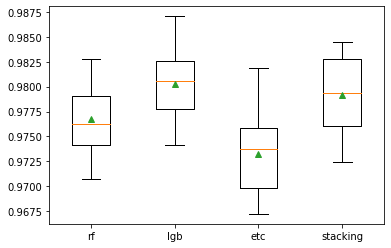

In [9]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [10]:

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

In [ ]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>rf 0.9796 (0.0035)
>lgb 0.9844 (0.0035)
>etc 0.9768 (0.0033)


In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

In [ ]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Accuracy','Precision','Recall','f1score']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.3
acc=[0.9788,0.9814,0.9942,0.9877]
plt.bar(ind, acc, width)
plt.ylim([0.96,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
#plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
#plt.ylabel("Memory consumption")
#plt.legend()
plt.title("Classification evaluation metrics")
# Display

plt.savefig('paper/shafin_all_feat.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')